<a href="https://colab.research.google.com/github/samgdotson/2019-dotson-winter/blob/master/steam_demand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Upload the steam data 

In [36]:
from google.colab import files
uploaded = files.upload()

Saving steam_demand19.csv to steam_demand19 (1).csv
Saving steam_demand18.csv to steam_demand18 (1).csv
Saving steam_demand17.csv to steam_demand17 (1).csv
Saving steam_demand16.csv to steam_demand16 (1).csv
Saving steam_demand15.csv to steam_demand15 (1).csv


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Read the steam data into dataframes

In [0]:
fy15 = pd.read_csv('steam_demand15.csv')
fy16 = pd.read_csv('steam_demand16.csv')
fy17 = pd.read_csv('steam_demand17.csv')
fy18 = pd.read_csv('steam_demand18.csv')
fy19 = pd.read_csv('steam_demand19.csv')

# Combine the data frames and then separate by calendar year

In [39]:
frames = [fy15,fy16,fy17,fy18,fy19]
combined = pd.concat(frames)

# rename the columns
combined = combined.rename(columns={'Date and Time':'time',
                                 'Value (KLBS/HR)':'demand',
                                 'eDNA Status as String':'status'})

# convert to datetime column
combined['time'] = pd.to_datetime(combined['time'])
combined

,time,demand,status
0,2014-07-01 00:00:00,105.872467,UNRELIABLE
1,2014-07-01 01:00:00,104.659416,UNRELIABLE
2,2014-07-01 02:00:00,105.016411,UNRELIABLE
3,2014-07-01 03:00:00,106.378754,UNRELIABLE
4,2014-07-01 04:00:00,106.899544,UNRELIABLE
...,...,...,...
8755,2019-06-30 19:00:00,117.837962,OK
8756,2019-06-30 20:00:00,116.572045,OK
8757,2019-06-30 21:00:00,114.853680,OK
8758,2019-06-30 22:00:00,113.802533,OK


### Regroup by year

In [0]:
regrouped = combined.groupby(combined.time.dt.year)

# we only care about complete years
df15 = regrouped.get_group(2015)
df16 = regrouped.get_group(2016)
df17 = regrouped.get_group(2017)
df18 = regrouped.get_group(2018)

# Check the 'unreliable' data

In [41]:
mask = (combined['status'] == 'UNRELIABLE')
# mask2 = (combined < 50)


pd.set_option('display.max_rows', 300)
combined[mask].head(300)

,time,demand,status
0,2014-07-01 00:00:00,105.872467,UNRELIABLE
1,2014-07-01 01:00:00,104.659416,UNRELIABLE
2,2014-07-01 02:00:00,105.016411,UNRELIABLE
3,2014-07-01 03:00:00,106.378754,UNRELIABLE
4,2014-07-01 04:00:00,106.899544,UNRELIABLE
10,2014-07-01 10:00:00,113.103882,UNRELIABLE
11,2014-07-01 11:00:00,115.083183,UNRELIABLE
12,2014-07-01 12:00:00,113.901650,UNRELIABLE
13,2014-07-01 13:00:00,115.247513,UNRELIABLE
14,2014-07-01 14:00:00,115.708527,UNRELIABLE


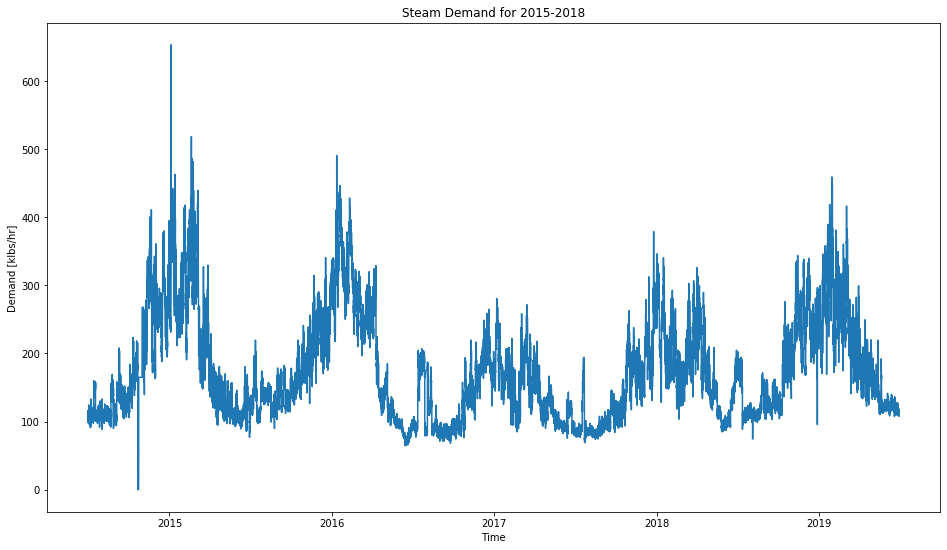

In [42]:
fig = plt.figure(figsize=(16,9),edgecolor='k',facecolor='w')
plt.plot(combined['time'],combined['demand'])
plt.title('Steam Demand for 2015-2018')
plt.xlabel('Time')
plt.ylabel('Demand [klbs/hr]')
plt.show()

The truly unreliable data only occurs in 2014 and in 2019, all other points are reasonable looking enough. 

# Plot each year

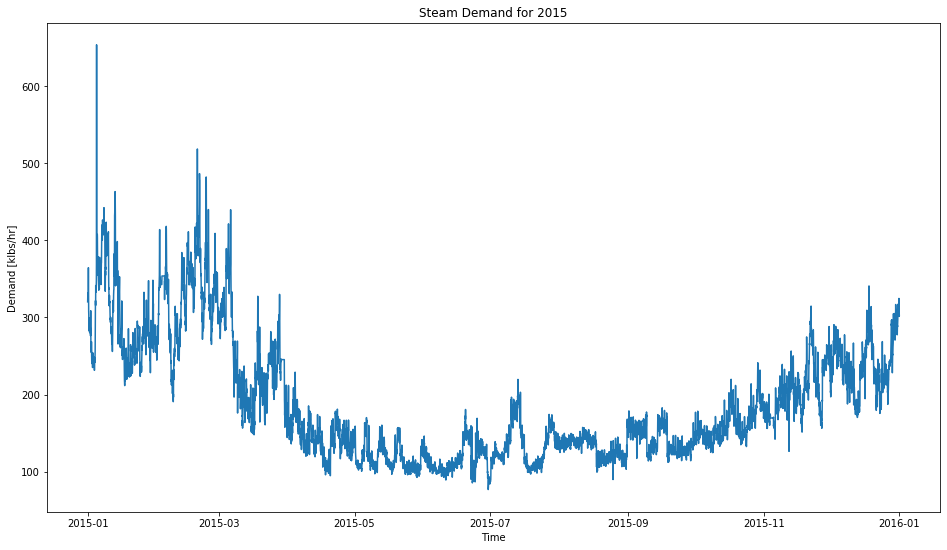

In [43]:
fig = plt.figure(figsize=(16,9),edgecolor='k',facecolor='w')
plt.plot(df15['time'],df15['demand'])
plt.title('Steam Demand for 2015')
plt.xlabel('Time')
plt.ylabel('Demand [klbs/hr]')
plt.show()

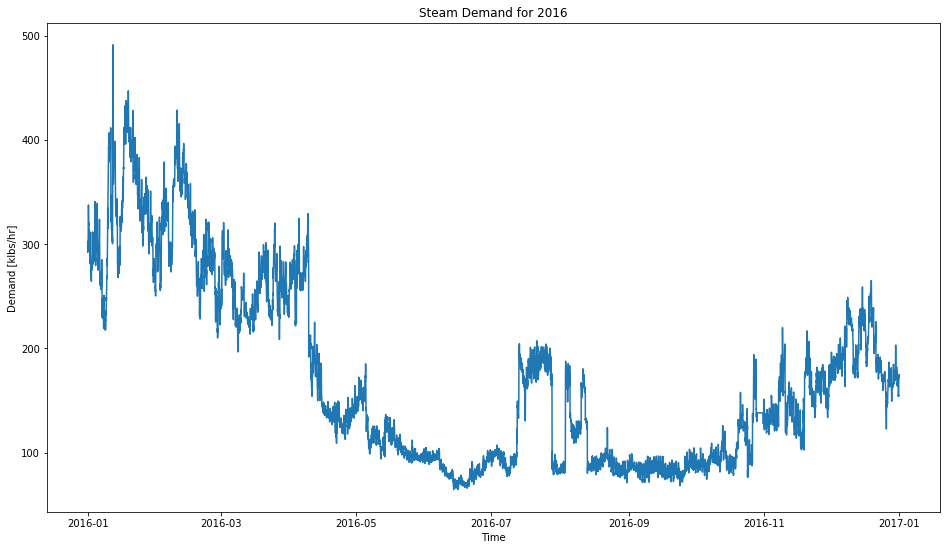

In [44]:
fig = plt.figure(figsize=(16,9),edgecolor='k',facecolor='w')
plt.plot(df16['time'],df16['demand'])
plt.title('Steam Demand for 2016')
plt.xlabel('Time')
plt.ylabel('Demand [klbs/hr]')
plt.show()

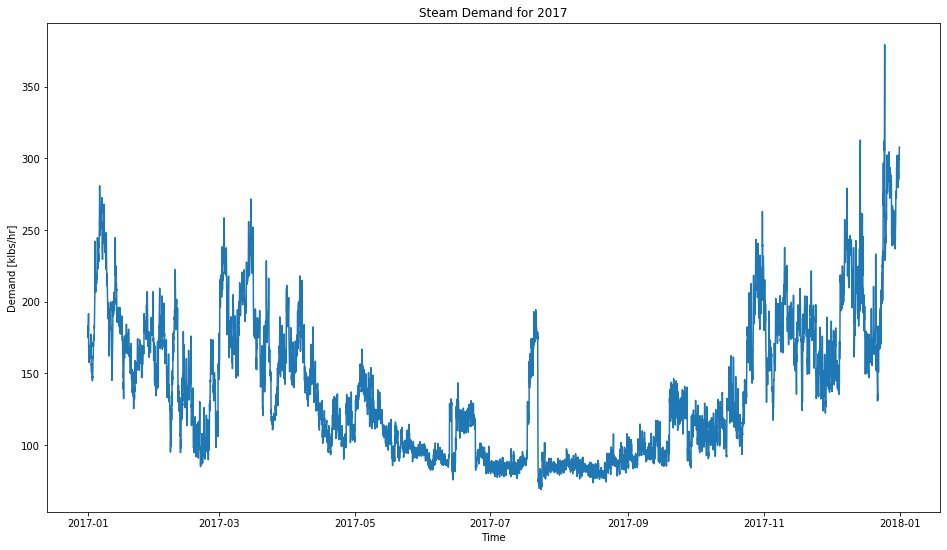

In [45]:
fig = plt.figure(figsize=(16,9),edgecolor='k',facecolor='w')
plt.plot(df17['time'],df17['demand'])
plt.title('Steam Demand for 2017')
plt.xlabel('Time')
plt.ylabel('Demand [klbs/hr]')
plt.show()

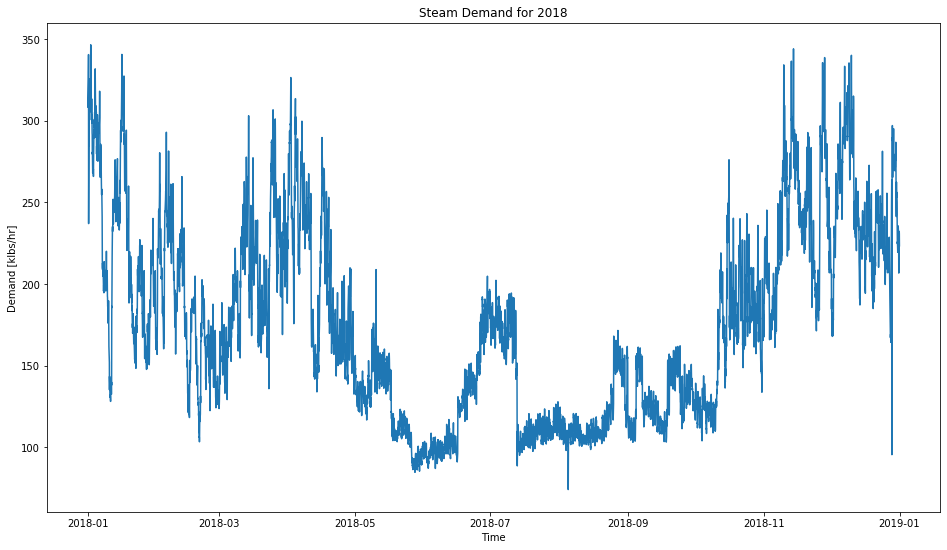

In [46]:
fig = plt.figure(figsize=(16,9),edgecolor='k',facecolor='w')
plt.plot(df18['time'],df18['demand'])
plt.title('Steam Demand for 2018')
plt.xlabel('Time')
plt.ylabel('Demand [klbs/hr]')
plt.show()

# Reset indices and save as a csv file

In [0]:
df15 = df15.reset_index(drop=True)
df16 = df16.reset_index(drop=True)
df17 = df17.reset_index(drop=True)
df18 = df18.reset_index(drop=True)

df15.time = df15.index
df16.time = df16.index
df17.time = df17.index
df18.time = df18.index

df15 = df15[['time','demand']]
df16 = df16[['time','demand']]
df17 = df17[['time','demand']]
df18 = df18[['time','demand']]

df15.to_csv('annual_steam2015.csv')
df16.to_csv('annual_steam2016.csv')
df17.to_csv('annual_steam2017.csv')
df18.to_csv('annual_steam2018.csv')

In [50]:
df18

,time,demand
0,0,308.428254
1,1,311.191381
2,2,313.863116
3,3,315.728345
4,4,316.977930
...,...,...
8755,8755,228.879782
8756,8756,226.827065
8757,8757,232.305353
8758,8758,230.647652


In [52]:
upload2 = files.upload()

Saving printTypicalSteam_0.csv to printTypicalSteam_0.csv


In [0]:
df = pd.read_csv('printTypicalSteam_0.csv')


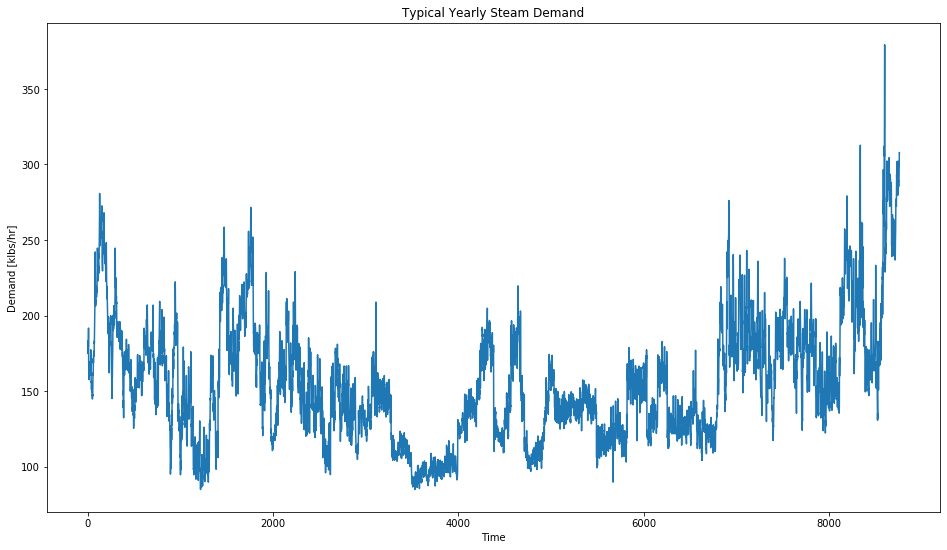

In [54]:
fig = plt.figure(figsize=(16,9),edgecolor='k',facecolor='w')
plt.plot(df['time'],df['demand'])
plt.title('Typical Yearly Steam Demand')
plt.xlabel('Time')
plt.ylabel('Demand [klbs/hr]')
plt.show()